In [1]:
# evaluate exercises

# Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

 - Load the tips dataset from either pydataset or seaborn.

 - Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

 - Here is some sample code to get you started:
 
     

In [ ]:
# from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
# model = LinearRegression().fit(X, y)
# predictions = model.predict(X)

- Modify and add to the code above as necessary for it to work with the tips dataset.

- Plot the residuals for the linear regression model that you made.

- Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

- Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

- Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

- What is the amount of variance explained in your model?

- Is your model better than the baseline model?

- Create a file named evaluate.py that contains the following functions.

    - plot_residuals(y, yhat): creates a residual plot
    - regression_errors(y, yhat): returns the following values:
        - sum of squared errors (SSE)
        - explained sum of squares (ESS)
        - total sum of squares (TSS)
        - mean squared error (MSE)
        - root mean squared error (RMSE)
    - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [9]:
# imports
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
from statsmodels.formula.api import ols

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [10]:
# getting my tips data
df = data('tips')

In [11]:
df.head() # check_yo_head

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
# creating a baseline for my df
df['yhat_baseline'] = df['tip'].mean()

In [21]:
df.head() #check_yo_head

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


In [22]:
# fiting my data using example provided
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(df[['total_bill']], df[['tip']])
predictions = model.predict(df[['total_bill']])

In [23]:
# creating a 'yhat' column from predictions 
df['yhat'] = predictions

In [24]:
df.head() # check_yo_head

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


In [27]:
# creating a 'residuals' column using 'tip' and 'yhat' column
df['residuals'] = df.tip - df.yhat

In [28]:
df.head() # check_yo_head

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178


In [29]:
# creating a 'baseline_residuals' column using 'tip' and 'baseline'
df['baseline_residuals'] = df.tip - df.yhat_baseline

In [30]:
df.head() # check_yo_head

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,baseline_residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


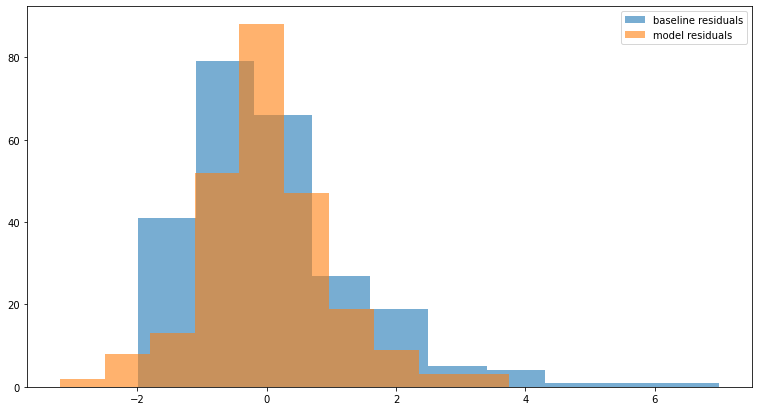

In [31]:
# Plot the residuals for the linear regression model that you made.
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(df.baseline_residuals, label='baseline residuals', alpha=.6)
ax.hist(df.residuals, label='model residuals', alpha=.6)
ax.legend()

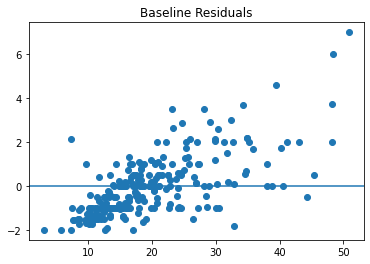

In [35]:
# taking a look at 'total_bill' and 'baseline_residuals' in a scatterplot
plt.scatter(x='total_bill', y='baseline_residuals', data = df)
plt.title('Baseline Residuals')
plt.axhline(y=0)
plt.show()

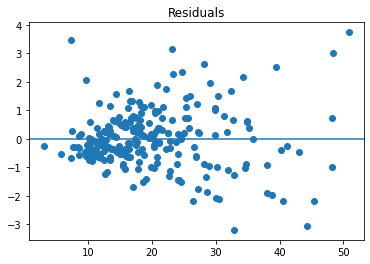

In [37]:
# taking a look at 'total_bill' and 'residuals' in a scatterplot
plt.scatter(x='total_bill', y='residuals', data = df)
plt.title('Residuals')
plt.axhline(y=0)
plt.show()

In [38]:
# Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

# first calculate the square of residuals
# Creates two new columns with the calculated values
df['residual^2'] = df.residuals**2
df['baseline_residual^2'] = df.baseline_residuals**2

df.head() # check_yo_head

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,baseline_residuals,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [39]:
# calculating the sum of square errors 'SSE' and 'SSE_baseline'
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 252.8
SSE Baseline = 465.2


In [41]:
# MSE (Mean Squared Error)
# average of SSE = SSE/(no. of data points)
# the average of your errors that have each been squared

len(df)
df.shape[0]

244

In [43]:
# MSE (Mean Squared Error)
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  1.0
MSE baseline =  1.9


In [44]:
# RMSE (Root Mean Squared Error)
# Square root of MSE
# Same units as the output (y) variable

from math import sqrt

RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  1.0
RMSE baseline =  1.4


In [46]:
df.head() # check_yo_head

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,baseline_residuals,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [49]:
#let's do it the easy way now

from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(df.tip, df.yhat)
MSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)

print("MSE", MSE2) 
print("MSE baseline" ,MSE2_baseline) 

MSE 1.036019442011377
MSE baseline 1.906608512496641


In [52]:
#calculate SSE

SSE2 = MSE2 * len(df)
SSE2_baseline = MSE2_baseline * len(df)

print("SSE", SSE2) 
print("SSE baseline" ,SSE2_baseline) 

SSE 252.788743850776
SSE baseline 465.2124770491804


In [54]:
#calculate RMSE: either take square root of MSE or use sklearn (kwarg 'squared = False')

RMSE2 = mean_squared_error(df.tip, df.yhat, squared = False)
RMSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline) 

RMSE 1.0178504025697377
RMSE baseline 1.3807999538298954


In [59]:
print("MSE manual == MSE sklearn: ", MSE == MSE2) 
print("MSE manual - baseline == MSE sklearn - baseline: ", MSE_baseline == MSE2_baseline) 

MSE manual == MSE sklearn:  True
MSE manual - baseline == MSE sklearn - baseline:  True


In [55]:
print("RMSE manual == RMSE skearn: ", RMSE == RMSE2) 
print("RMSE manual - baseline == RMSE skearn - baseline: ", RMSE_baseline == RMSE2_baseline) 

RMSE manual == RMSE skearn:  True
RMSE manual - baseline == RMSE skearn - baseline:  True


In [56]:
print("SSE manual == SSE sklearn: ", SSE == SSE2) 
print("SSE manual - baseline == SSE sklearn - baseline: ", SSE_baseline == SSE2_baseline) 

SSE manual == SSE sklearn:  True
SSE manual - baseline == SSE sklearn - baseline:  True


In [57]:
# calculate R2 manually:

# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline =   df['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = df['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

# Calculate R2
R2 = ESS/TSS
R2

0.45661658635167646

In [58]:
# calculate R2 the easy way:

from sklearn.metrics import r2_score
r2_score(df.tip, df.yhat)

0.45661658635167657

In [60]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

NameError: name 'df_eval' is not defined